<a href="https://colab.research.google.com/github/nsenja/PCVK_GENAP_2022/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

#accessing google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


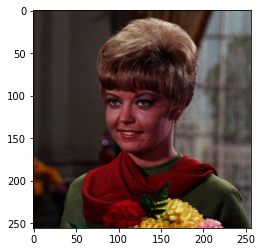

In [8]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_rgb = cv.cvtColor(original,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

Gamma Correction 

Gamma (Power-Law Transformation), di simbolkan dengan huruf yunani 𝛾, dijelaskan sebagai hubungan antara masukan dan keluaran yang dihasilkan. Masukan yang dimaksud adalah nilai intensitas RGB dari citra.

 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


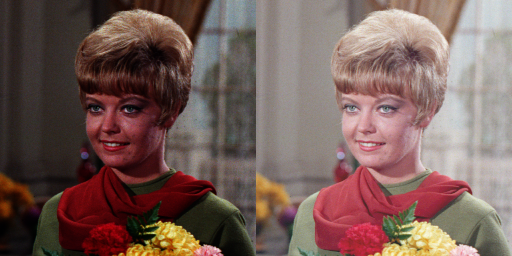

In [24]:
print(' Gamma Correction pada citra ')
print('-----------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
final_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     final_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, final_image))
cv2_imshow(final_frame)

**Bit Depth**

Operasi ini digunakan untuk menunjukkan pada anda tentang kuantisasi citra. Kuantisasi yang dilakukan adalah pada nilai kedalaman warna 1 – 7 bit.

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 1


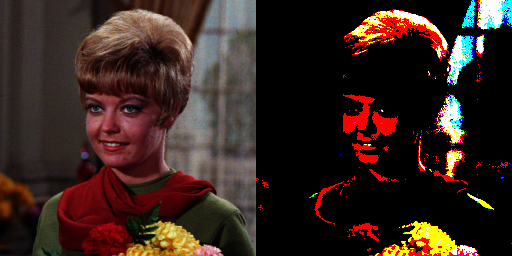

In [25]:
original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
final_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     final_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, final_image))
cv2_imshow(final_frame)

**Average Denoising**

In [26]:
import glob
from math import log10, sqrt

Citra 25

Nilai PSNR adalah 27.53506335333059 (dB)


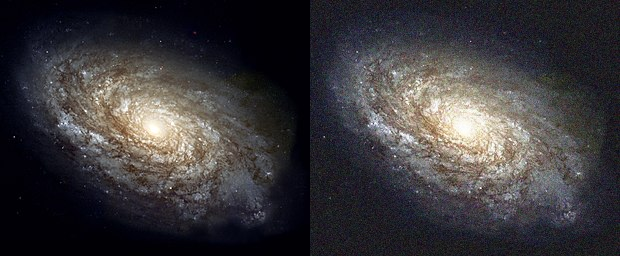

In [27]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Citra 50

Nilai PSNR adalah 27.5013723387608 (dB)


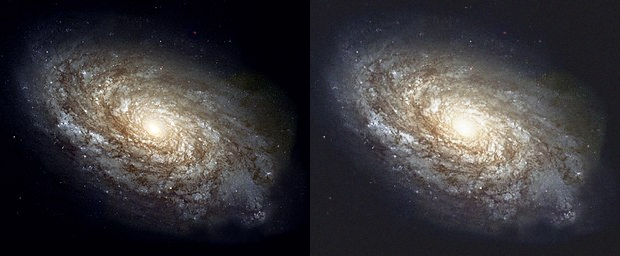

In [16]:
dst = cv_img[0]
noise_number = 49 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Citra 80

Nilai PSNR adalah 27.507931840854955 (dB)


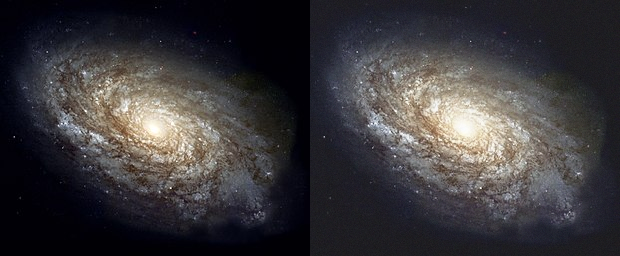

In [17]:
dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Citra 100

Nilai PSNR adalah 27.51308313304129 (dB)


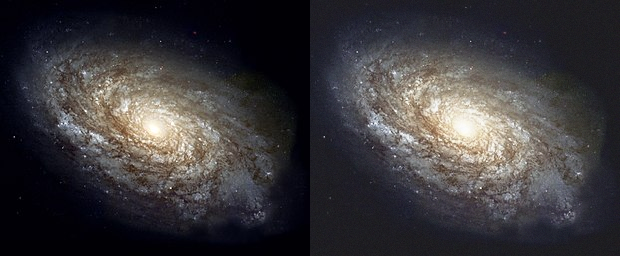

In [18]:
dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

**Image Masking**

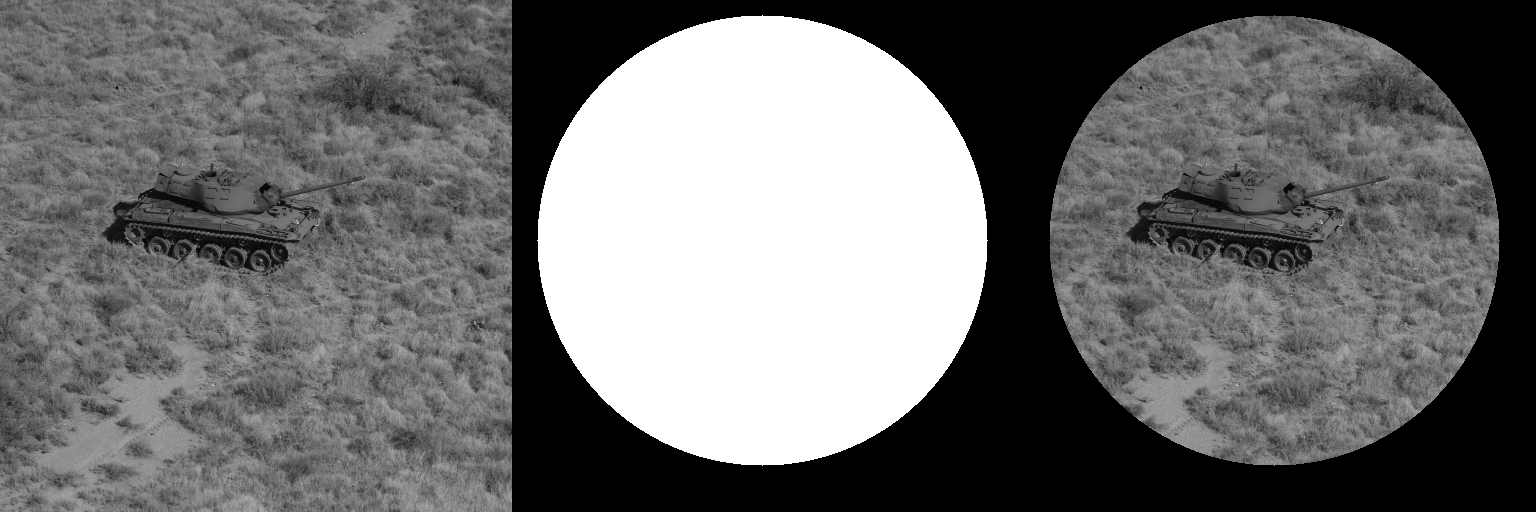

In [19]:
img_tank = cv.imread('/content/drive/MyDrive/PCVK/Images/tank.tiff')

mask = np.zeros(img_tank.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 240), 225, (255,255,255), -1)

masked = img_tank & mask

tank_frame = cv.hconcat((img_tank, mask, masked))
cv2_imshow(tank_frame)

**Other Operation**

Operator OR

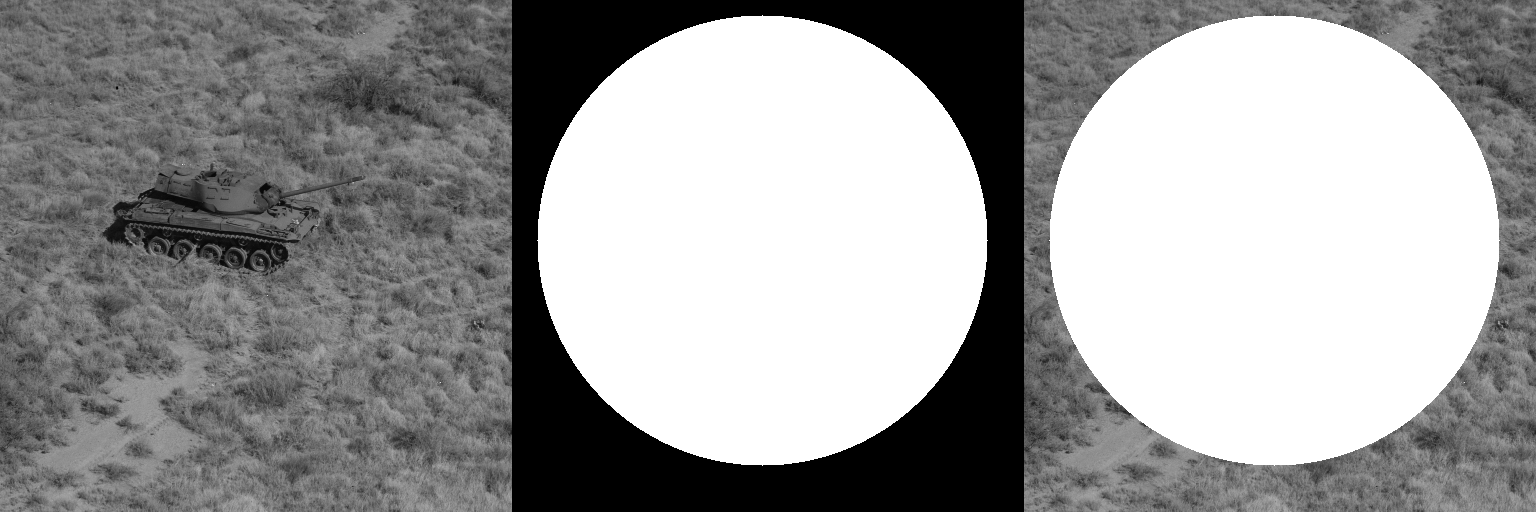

In [20]:
img_tank = cv.imread('/content/drive/MyDrive/PCVK/Images/tank.tiff')

mask = np.zeros(img_tank.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 240), 225, (255,255,255), -1)

masked = img_tank | mask

tank_frame = cv.hconcat((img_tank, mask, masked))
cv2_imshow(tank_frame)

Operator AND

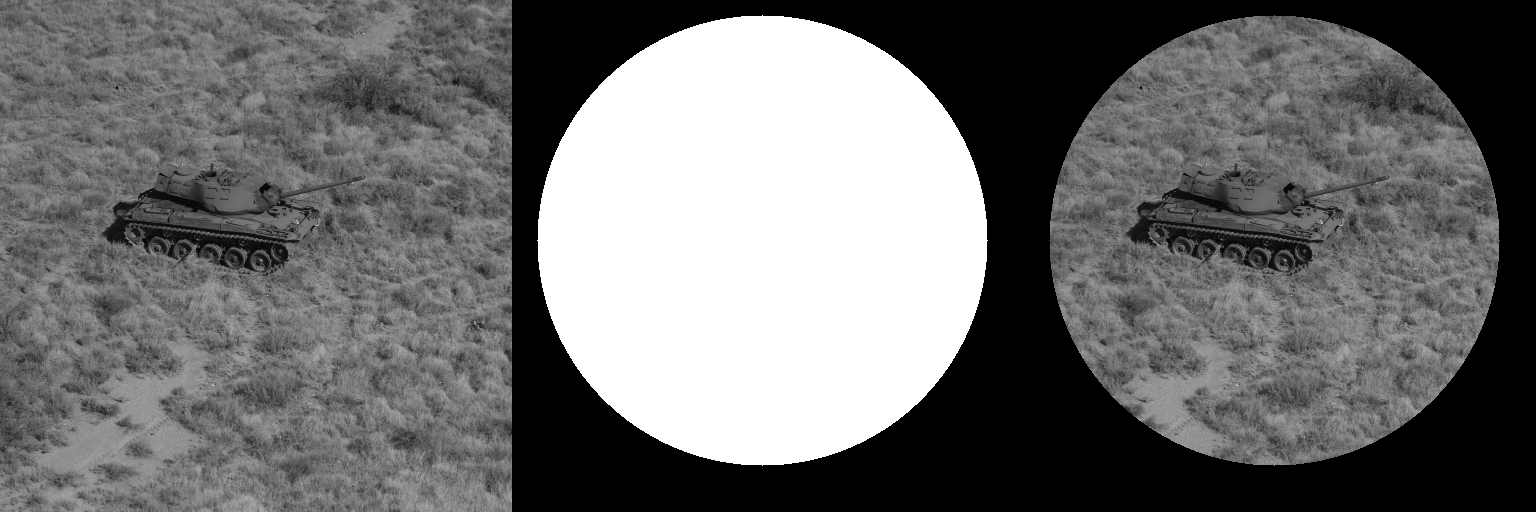

In [21]:
img_tank = cv.imread('/content/drive/MyDrive/PCVK/Images/tank.tiff')

mask = np.zeros(img_tank.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 240), 225, (255,255,255), -1)

masked = img_tank & mask

tank_frame = cv.hconcat((img_tank, mask, masked))
cv2_imshow(tank_frame)

Operator NOT

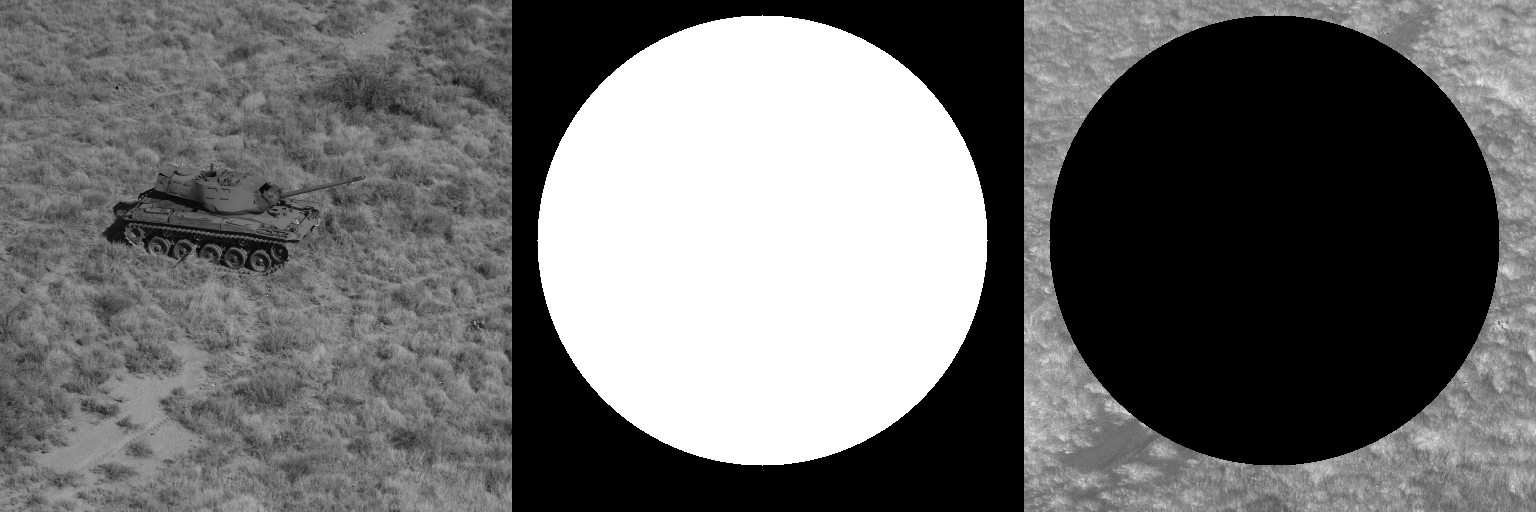

In [23]:
img_tank = cv.imread('/content/drive/MyDrive/PCVK/Images/tank.tiff')

mask = np.zeros(img_tank.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 240), 225, (255,255,255), -1)

masked = ~img_tank & ~mask

tank_frame = cv.hconcat((img_tank, mask, masked))
cv2_imshow(tank_frame)